### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [105]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ecommerce_sales_data.csv')
# print(df.head(5))

# print(df.isnull().sum())

# 각 열의 데이터 타입 확인
# print(df.dtypes)

# OrderDate 열 -> datetime 형식으로 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.dtypes)


OrderID                int64
Product               object
Category              object
Quantity               int64
Price                  int64
CustomerID             int64
Birthdate             object
OrderDate     datetime64[ns]
Country               object
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [106]:
# 매출액을 계산하는 새로운 열 생성
df['TotalRevenue'] = df['Quantity'] * df['Price']

C:\Users\Playdata\AppData\Local\Temp\ipykernel_26068\3450472203.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('OrderDate')['TotalRevenue'].resample('M').sum()


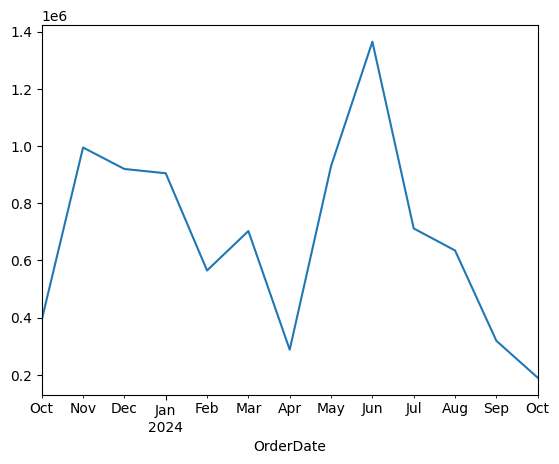

In [107]:
# 월별 총 매출액 집계
# 월별로 데이터 집계
# 월별 총 매출액 집계 -> 시각화 (불러오기)
import matplotlib.pyplot as plt

monthly_revenue = df.set_index('OrderDate')['TotalRevenue'].resample('M').sum()
monthly_revenue.plot(kind='line')
plt.show()

In [108]:
# 카테고리별 그룹화
# 카테고리별 매출액 가장 높은 상위 3개 출력
print(df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3))

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [109]:
# 국가별 그룹화
# 국가별 총 매출액 계산
# 매출액 가장 높은 국가 5개 출력
print(df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5))

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [110]:
# 고객 그룹화 -> 고객별 총 매출액 sum 
# 총 매출액의 상위 5명의 고객 출력
print(df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5))

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [111]:
# 주문 횟수가 가장 많은 상위 5명
print(df.groupby('CustomerID')['OrderID'].nunique().sort_values(ascending=False).head(5))


CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64


In [112]:
# 생일 형태 파악 -> 숫자로 변경
# 연령대로 고객을 분류 -> 조건+ 비교연산으로 가정의 연령대를 나누기
# 연령별 그룹화
# 각 연령대별로 가장 많이 구매한 상품의 카테고리
# 고객 연령대 없으므로, 임의로 가정한 데이터 삽입

df['Birthdate'] = pd.to_datetime(df['Birthdate']) # 형태 변경
df['Age'] = 2025 - df['Birthdate'].dt.year # 현재 나이로 변경

# 연령대 정의
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    else:
        return '50대 이상'
    
df['AgeGroup'] = df['Age'].apply(age_group)

# 연령대 별로 많이 구매한 상품의 카테고리
print(df.groupby('AgeGroup')['Category'].agg(lambda x: x.value_counts().idxmax()))



AgeGroup
20대            Beauty
30대              Food
40대             Books
50대 이상    Electronics
Name: Category, dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [113]:
# 상품별 그룹
# 각 상품의 총 판매수량 합계
# 가장 많이 판매된 상위 5개 출력
print(df.groupby('Product')['Quantity'].sum().nlargest(5))

Product
셔츠     25
립스틱    22
소설     21
역사책    20
커피     20
Name: Quantity, dtype: int64


In [114]:
# 카테고리 그룹화
# 카테고리별 가장 많이 판매된 상품 출력
print(df.groupby('Category')['Product'].agg(lambda x: x.value_counts().idxmax()))

Category
Beauty         립스틱
Books          역사책
Clothing        셔츠
Electronics    노트북
Food            과자
Sports         축구공
Name: Product, dtype: object


In [115]:
# 제품 별 구매 수량 -> 제품 그룹, 구매수량에 대해
# 제품 별 구매 수량 평균값
# 평균값이 가장 높은 상품 3개 출력
print(df.groupby('Product')['Quantity'].mean().nlargest(3))

Product
자기계발    5.0
주스      5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

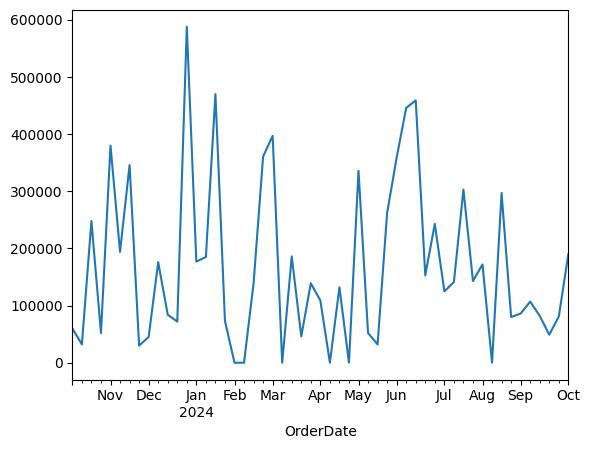

In [116]:
# 주문 데이터에서 날짜별 총 수익 추출 (일자별에서)
# 그것을 주 단위로 묶는 데이터 재정렬 (주별로 변형)
# 주별 총 수익 추출
# 시각화
df.set_index('OrderDate')['TotalRevenue'].resample('W').sum().plot(kind='line')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_26068\2725669471.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_filtered.set_index('OrderDate')['TotalRevenue'].resample('M').sum().plot(kind='line')


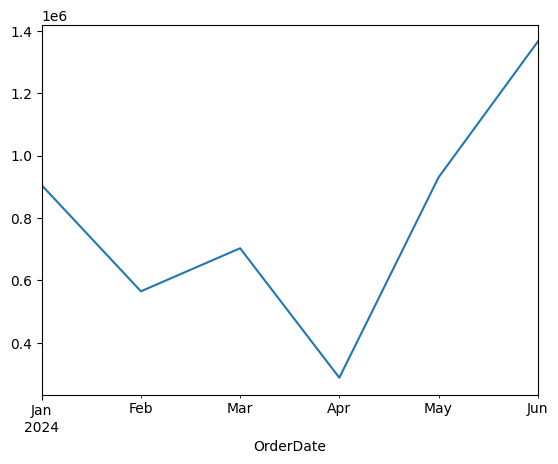

In [125]:
# 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
# 특정기간 필터링 (orderdate 형태 확인 -> yyyy-hh-mm)
# 총 매출액 TotalRevenue
# 월 기준으로 재정렬
# 월 기준의 매출액들의 합
# 시각화

filtered = (df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')
date_filtered = df.loc[filtered] # 특정기간 필터링

date_filtered.set_index('OrderDate')['TotalRevenue'].resample('M').sum().plot(kind='line')
plt.show()


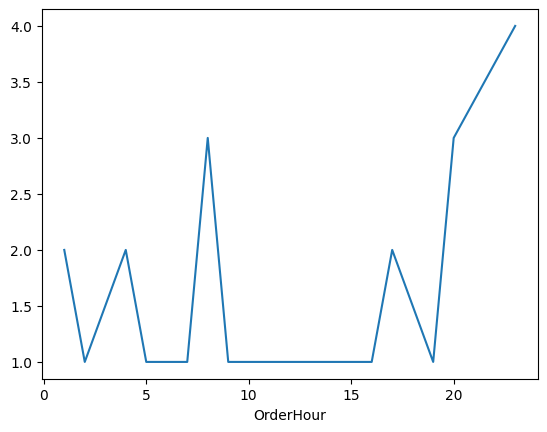

In [137]:
# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.
# 시간대 추출
# 특정 국가 데이터 필터링
# 시간대별 주문 횟수
# 시각화 도출 -> 가잘 많이 주문한 시간대를 찾기위한 인사이트
df['OrderHour'] = df['OrderDate'].dt.hour

df[df['Country'] == '중국'].groupby('OrderHour')['OrderID'].count().plot(kind='line')
plt.show()


6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [142]:
# 고객id별 주문id 수 뽑아내기
# 재구매 고객과 아닌 고객 분류
# 재구매율 = (두 번이상 구매한 고객 수(재구매고객) / 총 고객 수) * 100
customer_orders = df.groupby('CustomerID')['OrderID'].nunique()

repeat_customers = customer_orders[customer_orders > 1].count()
single_purchase_customers = customer_orders[customer_orders == 1].count()

total_customers = customer_orders.count()
repeat_rate = (repeat_customers / total_customers * 100)

print(repeat_rate)

8.108108108108109


In [145]:
# 할인율 열 추가 (임의 할인율)
# 할인율을 적용한 할인된 수익 계산
# 상품 카테고리별 할인된 수익 합산
# 할인율이 높은 카테고리의 매출액 출력
df['DiscountRate'] = np.random.uniform(0, 0.5, len(df))
df['DiscountedRevenue'] = df['TotalRevenue'] * (1 - df['DiscountRate'])
print(df.groupby('Category')['DiscountedRevenue'].sum().nlargest())

Category
Electronics    1.304960e+06
Food           1.301444e+06
Beauty         1.214066e+06
Clothing       1.011717e+06
Books          1.009718e+06
Name: DiscountedRevenue, dtype: float64
